In [1]:
pip install --upgrade tensorflow

     |████████████████████████████████| 320.4MB 35kB/s 
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense


### 6.2.1. Creating Model Architecture

In [4]:
cnn_model = Sequential()

In [5]:
conv_layer1 = Conv2D (32, (3, 3), input_shape = (64, 64, 3), activation = 'relu')
cnn_model.add(conv_layer1) 

In [6]:
pool_layer1 = MaxPooling2D(pool_size = (2, 2))
cnn_model.add(pool_layer1) 

In [7]:
conv_layer2 = Conv2D (32, (3, 3), input_shape = (64, 64, 3), activation = 'relu')
cnn_model.add(conv_layer2) 

In [8]:
pool_layer2 = MaxPooling2D(pool_size = (2, 2))
cnn_model.add(pool_layer2) 

In [9]:
flatten_layer = Flatten()
cnn_model.add(flatten_layer ) 

In [10]:
dense_layer1 = Dense(units = 128, activation = 'relu')
cnn_model.add(dense_layer1) 

In [11]:
dense_layer2 = Dense(units = 1, activation = 'sigmoid')
cnn_model.add(dense_layer2) 


In [12]:
cnn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

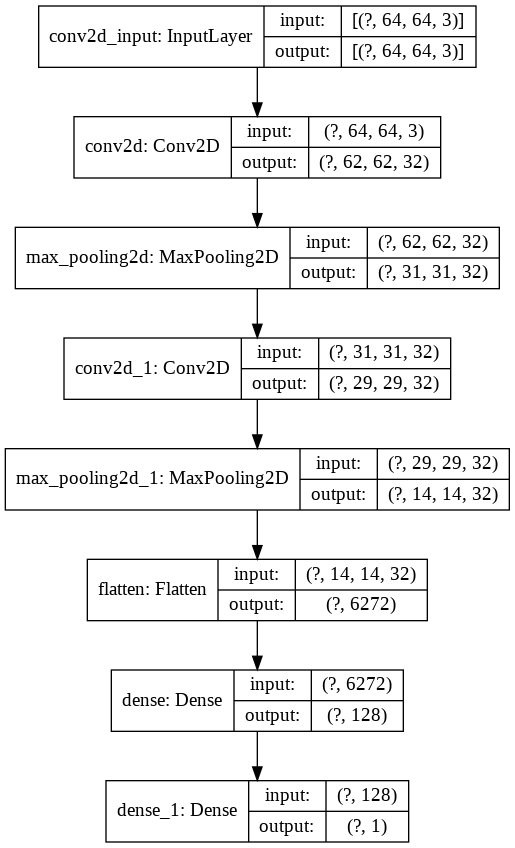

In [13]:
#plotting model architecture
from tensorflow.keras.utils import plot_model
plot_model(cnn_model, to_file='/gdrive/My Drive/datasets/model_plot1.png', show_shapes=True, show_layer_names=True)

### 6.2.2. Image Augmentation

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator  = ImageDataGenerator(rescale = 1./255, 
                                      shear_range = 0.2, 
                                      zoom_range = 0.2, 
                                      horizontal_flip = True)


In [15]:
test_generator = ImageDataGenerator(rescale = 1./255)

### 6.2.3. Dividing the Data into The Training and Test Sets

In [17]:
training_data = train_generator.flow_from_directory(r'/gdrive/My Drive/datasets/Animal Dataset/training_set',
                                                    target_size = (64, 64),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_data = test_generator.flow_from_directory('/gdrive/My Drive/datasets/Animal Dataset/test_set',
                                             target_size = (64, 64),
                                             batch_size = 32,
                                             class_mode = 'binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### 6.2.4. Training Convolutional Neural Network Model

In [19]:
cnn_model.fit(training_data,
                      steps_per_epoch = (8000/32),
                      epochs = 25,
                      validation_data = test_data,
                      validation_steps = (2000/32))


Epoch 1/25
250/250 [==============================] - 1805s 7s/step - loss: 0.6730 - accuracy: 0.5840 - val_loss: 0.6345 - val_accuracy: 0.6345
Epoch 2/25
250/250 [==============================] - 93s 371ms/step - loss: 0.6099 - accuracy: 0.6714 - val_loss: 0.6088 - val_accuracy: 0.6910
Epoch 3/25
250/250 [==============================] - 93s 373ms/step - loss: 0.5671 - accuracy: 0.6994 - val_loss: 0.5849 - val_accuracy: 0.7035
Epoch 4/25
250/250 [==============================] - 91s 363ms/step - loss: 0.5278 - accuracy: 0.7322 - val_loss: 0.5117 - val_accuracy: 0.7455
Epoch 5/25
250/250 [==============================] - 91s 364ms/step - loss: 0.5014 - accuracy: 0.7484 - val_loss: 0.4852 - val_accuracy: 0.7720
Epoch 6/25
250/250 [==============================] - 90s 359ms/step - loss: 0.4860 - accuracy: 0.7606 - val_loss: 0.5318 - val_accuracy: 0.7445
Epoch 7/25
250/250 [==============================] - 91s 362ms/step - loss: 0.4753 - accuracy: 0.7714 - val_loss: 0.4736 - val_acc

### 6.2.5. Making a Prediction on a Single Image

In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image

single_image = image.load_img("/gdrive/My Drive/datasets/Animal Dataset/single_prediction/cat_or_dog_1.jpg", target_size= (64, 64))

In [25]:
type(single_image)

PIL.Image.Image

In [27]:
single_image = image.img_to_array(single_image)
single_image = np.expand_dims(single_image, axis = 0)


In [28]:
image_result = cnn_model.predict(single_image)

In [29]:
training_data.class_indices

{'cats': 0, 'dogs': 1}

In [30]:
print(image_result[0][0])

1.0


## Exercise 6.1

**Question 1**

What should be the input shape of the input image to the convolutional neural network?

A.	 Width, Height

B.	Height, Width

C.	Channels, Width, Height

D.	Width, Height, Channels


**Answer: D**


**Question 2**

The pooling layer is used to pick correct features even if:

A.	 Image is Inverted

B.	Image is distorted

C.	Image is compressed

D.	All of the above


**Answer: D**

**Question 3**

The ReLu activation function is used to introduce:

A.	Linearity

B.	Non-linearity

C.	Quadraticity

D.	None of the above


**Answer: B**
